In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
EdgeList = [(0, 1), (0, 2), (0, 9),
            (1, 2),
            (3, 4), (3, 5), (3, 9),
            (4, 5),
            (6, 7), (6, 8), (6, 9),
            (7, 8)]

In [3]:
N = 10 #number of nodes
NodeList = range(N)

In [4]:
G = nx.Graph()

In [5]:
G.add_nodes_from(NodeList)
G.add_edges_from(EdgeList)

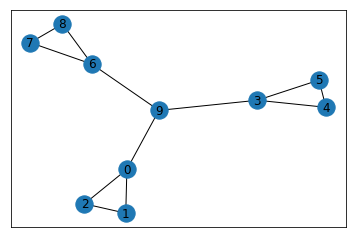

In [6]:
nx.draw_networkx(G)
plt.show()

In [7]:
A = nx.adjacency_matrix(G)

In [8]:
M = G.number_of_edges()

In [9]:
M

12

In [10]:
# Suppose we have the following communities:

comm_a = {0, 1, 2, 9}
comm_b = {3, 4, 5}
comm_c = {6, 7, 8}

comm_List = [comm_a, comm_b, comm_c]

---

Calculate modularity using my own function:

In [11]:
def CommunityKronecker(comm_List, v, w):
    #comm_List = list of all communities. THIS MUST BE A LIST OF SETS!
    #v, w = nodes
    #This function checks in nodes v and w are both in the same community.
    
    if type(comm_List)!=list:
        return ("Dude, the list of communities, ie comm_List, you gave to this function is NOT A LIST! CHECK!")
    else:
        KronDelta = 0

        for comm in comm_List:
            if (v in comm) and (w in comm):
                KronDelta += 1
                #print (v, w, comm)

        if KronDelta>1:
            print ("Error! Some node appears in 2 different communities! Check!")
        else:
            return (KronDelta)

In [12]:
Q = 0
for v in NodeList:
    kv = nx.degree(G, v)
    for w in NodeList:
        kw = nx.degree(G, w)
        Q += ( A[v, w] - (kv*kw)/(2*M) ) * CommunityKronecker(comm_List, v, w)
Q = Q/(2*M)

In [13]:
print (Q)

0.4895833333333334


---

Calculate modularity in-built networkx function for modularity matrix:

In [14]:
B = nx.modularity_matrix(G)

$\bf{B}$ is the modularity matrix for a given network, and it is defined by:
$$ B_{ij} = A_{ij} - \frac{k_{i} k_{j}}{2M} $$

Now, using this defn of $\bf{B}$ along with $\delta_{c_{v},c_{w}}$ (which we get from how we have guessed communities), we get the modularity, Q.

In [15]:
Q2 = 0
for v in range(N):
    for w in range(N):
        Q2 += B[v, w] * CommunityKronecker(comm_List, v, w)
Q2 = Q2/(2*M)

In [16]:
print (Q2)

0.4895833333333334
